In [1]:
%load_ext autoreload
%autoreload 2
    
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from loguru import logger
from tqdm.auto import tqdm

from rdkit import Chem
import datamol as dm

In [10]:
smiles_batch = ["CCCC", "O=C(C)Oc1ccccc1C(=O)O"]
smiles = smiles_batch[1]

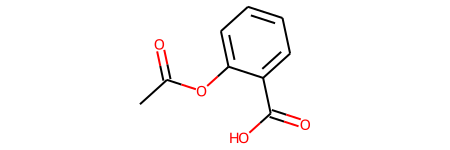

In [12]:
dm.to_mol(smiles)

In [8]:
def randomize_smiles(inchi: str = None, smiles: str = None):

    # Init the molecule
    if inchi is not None:
        mol = Chem.MolFromInchi(inchi)
    elif smiles is not None:
        mol = Chem.MolFromSmiles(smiles)

    mol = Chem.AddHs(mol)

    # Rearrange atom indices
    ans = list(range(mol.GetNumAtoms()))
    np.random.shuffle(ans)
    nm = Chem.RenumberAtoms(mol, ans)

    # Generate the smiles
    return Chem.MolToSmiles(nm, canonical=False, allHsExplicit=True)

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RenumberAtoms()
did not match C++ signature:
    RenumberAtoms(RDKit::ROMol mol, boost::python::api::object {lvalue} newOrder)